In [1]:
from typing import Tuple

import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
def f(x: float) -> float:
    return x ** 2 + x + 10

In [3]:
def relu(x: float) -> float:
    if x > 0:
        return x
    else:
        return 0

In [4]:
def get_dataset() -> Tuple[np.ndarray, np.ndarray]:
    x = np.linspace(start=-10.0, stop=10.0, num=1000).reshape(-1, 1)
    y = f(x)
    return x, y

In [5]:
def build_model1() -> Sequential:
    model = Sequential()
    model.add(Dense(200))  # Input zu Hidden
    model.add(Dense(200))  # Input zu Hidden
    model.add(Dense(1))  # Vom Hidden zum Output
    return model

In [ ]:
def build_model2() -> Sequential:
    model = Sequential()
    model.add(Dense(500))  # Input zu Hidden
    model.add(Activation("relu"))  # ReLU vom Hidden
    model.add(Dense(500))  # Input zu Hidden
    model.add(Activation("relu"))  # ReLU vom Hidden
    model.add(Dense(1))  # Vom Hidden zum Output
    return model


In [ ]:
def build_model3() -> Sequential:
    model = Sequential()
    model.add(Dense(500))  # Input zu Hidden
    model.add(Activation("sigmoid"))  # ReLU vom Hidden
    model.add(Dense(500))  # Input zu Hidden
    model.add(Activation("sigmoid"))  # ReLU vom Hidden
    model.add(Dense(1))  # Vom Hidden zum Output
    return model

Epoch 1/20
32/32 [==============================] - 2s 2ms/step - loss: 1537.5959
Epoch 2/20
32/32 [==============================] - 0s 2ms/step - loss: 123.5930
Epoch 3/20
32/32 [==============================] - 0s 2ms/step - loss: 86.9949
Epoch 4/20
32/32 [==============================] - 0s 2ms/step - loss: 71.9576
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 60.9071
Epoch 6/20
32/32 [==============================] - 0s 2ms/step - loss: 52.7375
Epoch 7/20
32/32 [==============================] - 0s 3ms/step - loss: 46.3432
Epoch 8/20
32/32 [==============================] - 0s 2ms/step - loss: 38.9238
Epoch 9/20
32/32 [==============================] - 0s 2ms/step - loss: 35.1051
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 31.1338
Epoch 11/20
32/32 [==============================] - 0s 2ms/step - loss: 28.0166
Epoch 12/20
32/32 [==============================] - 0s 2ms/step - loss: 27.0479
Epoch 13/20
32/32 [===============

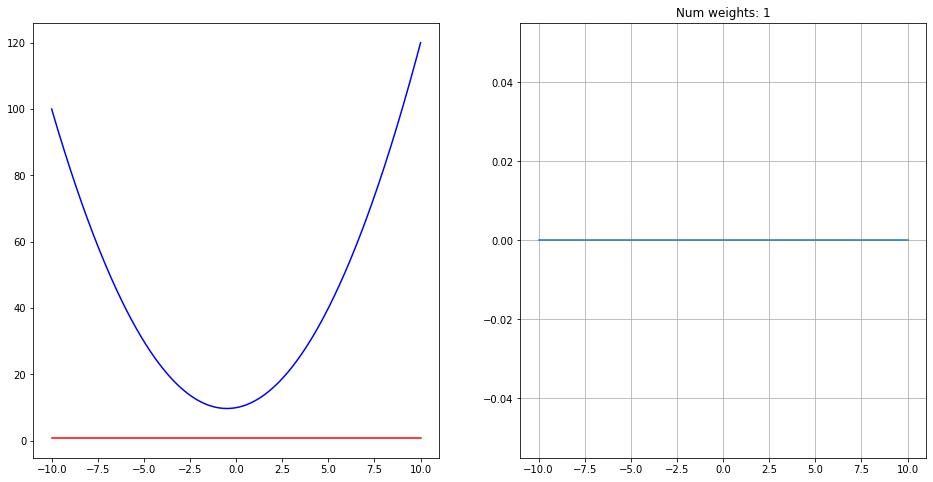

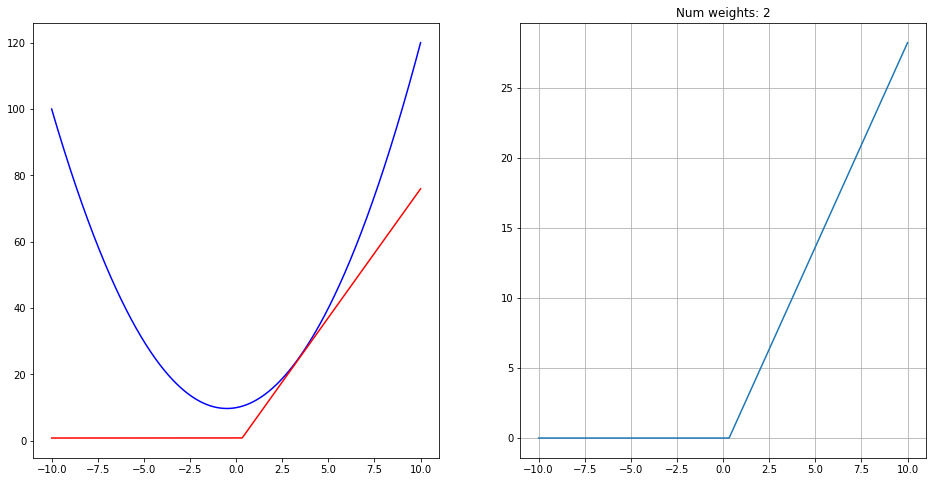

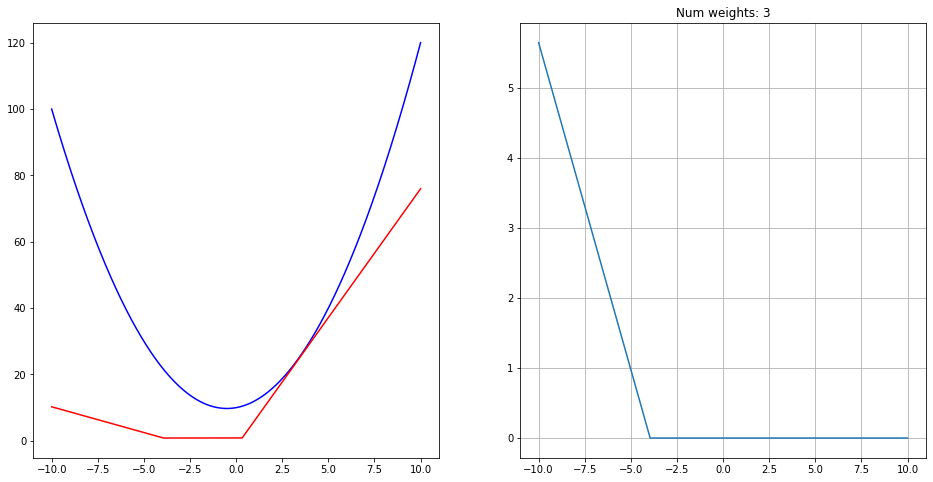

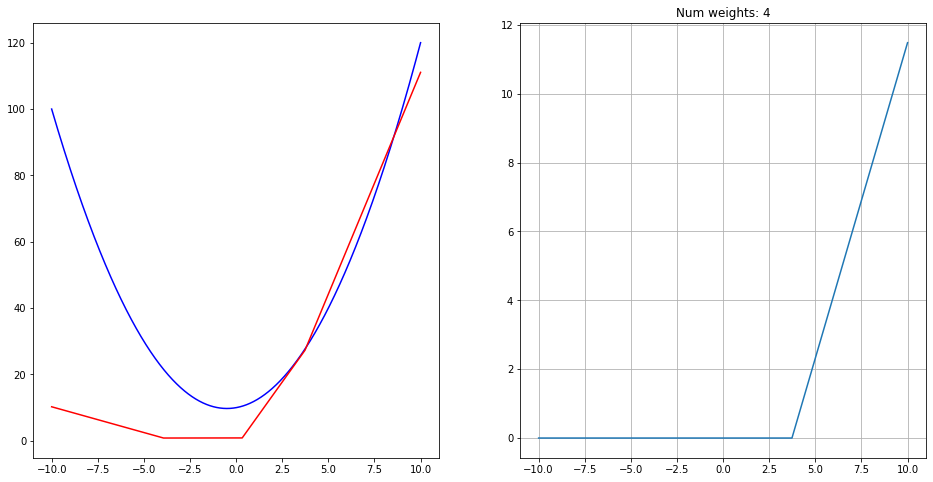

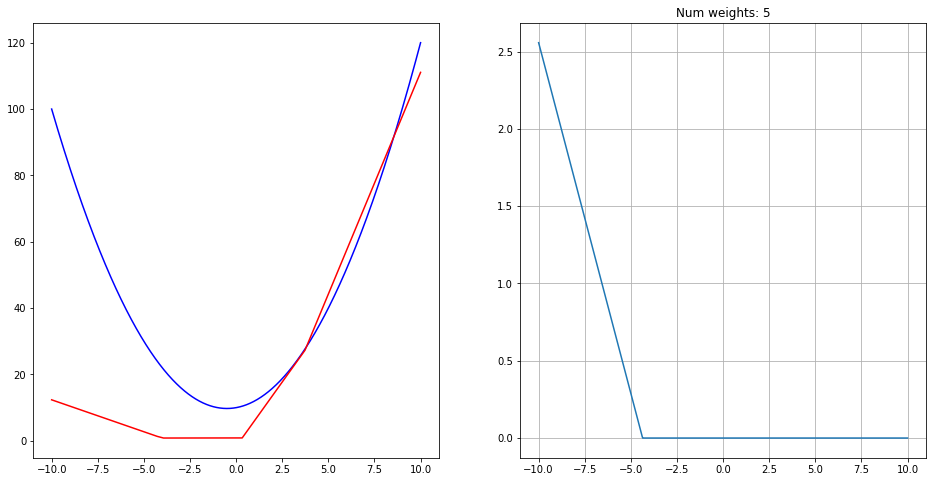

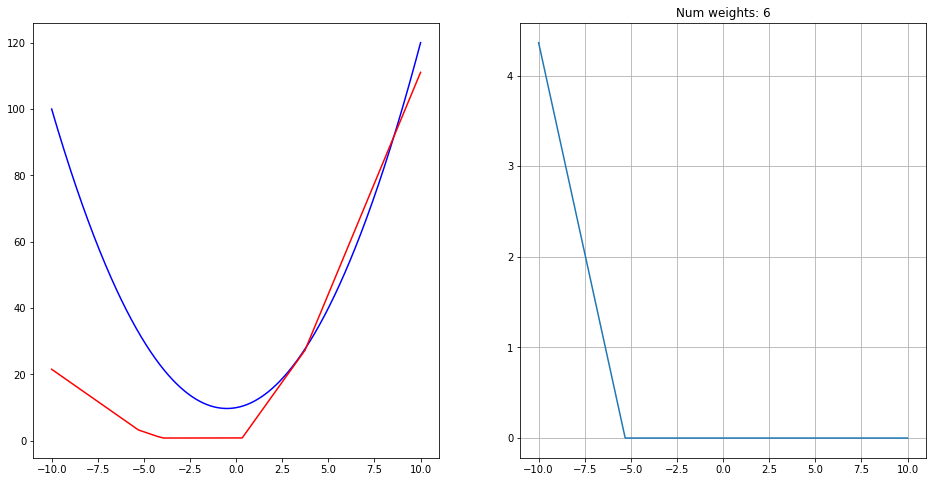

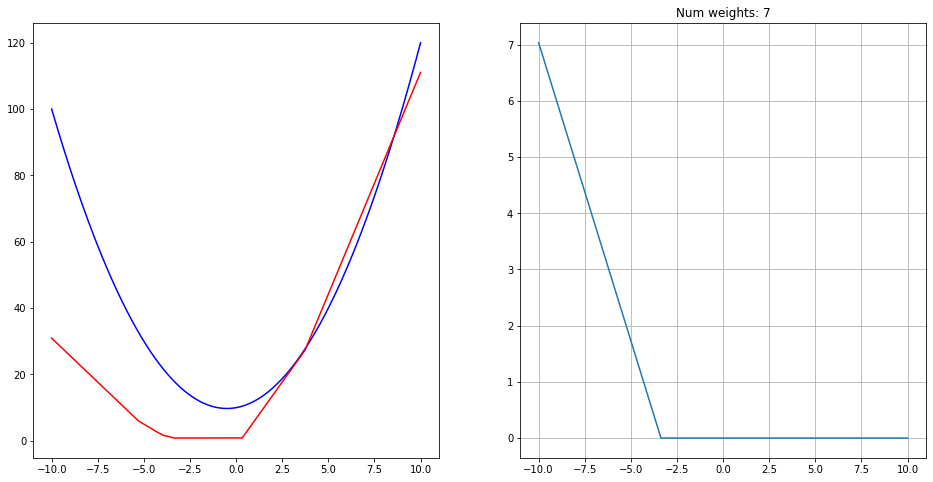

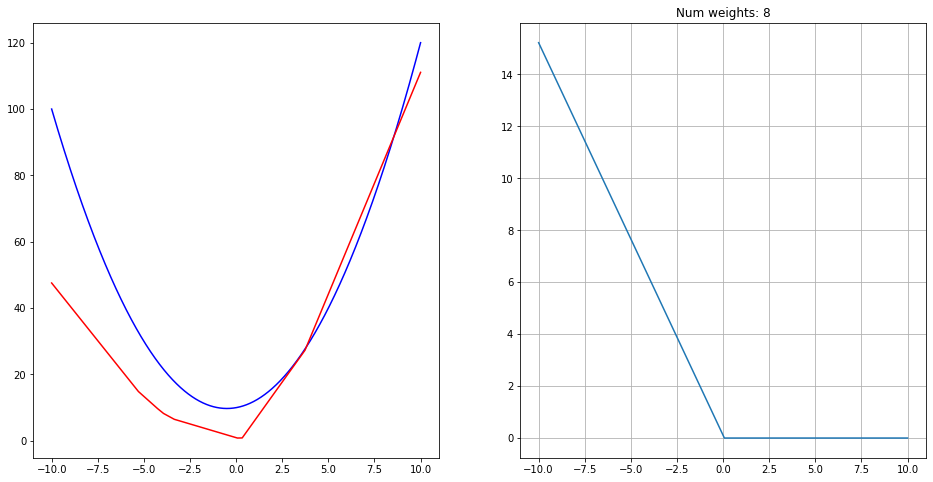

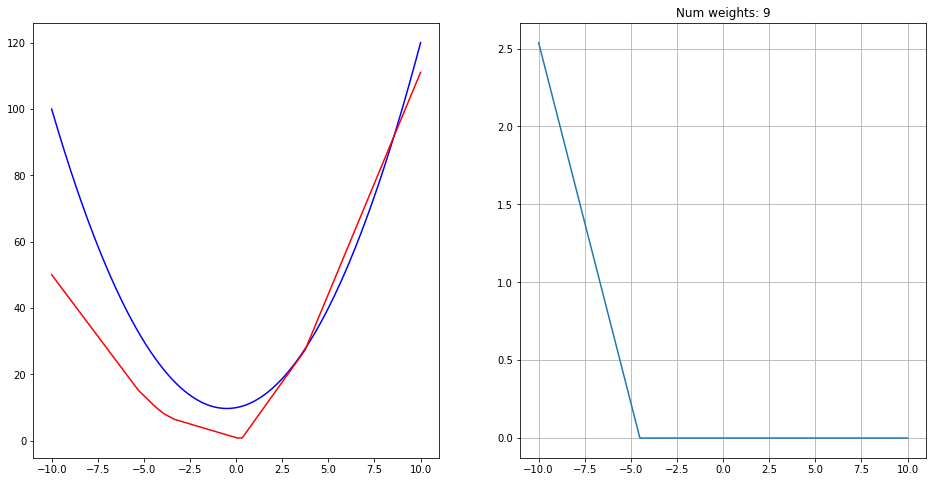

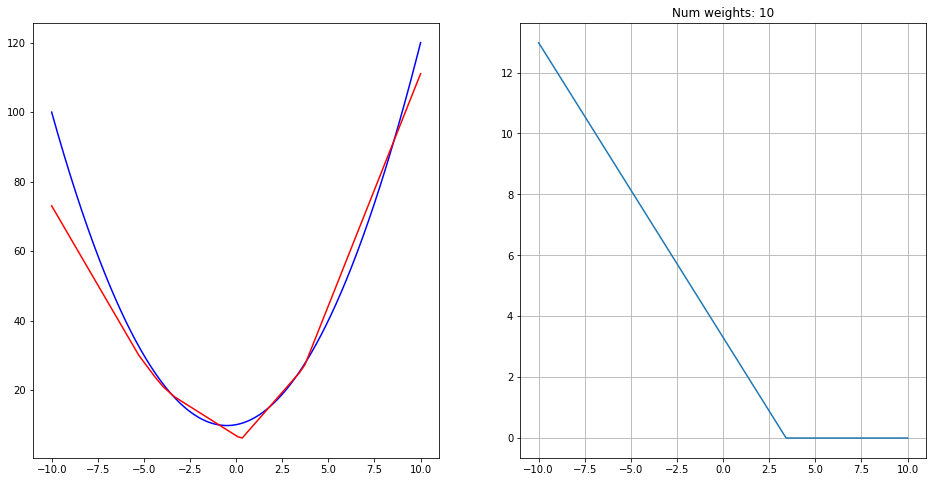

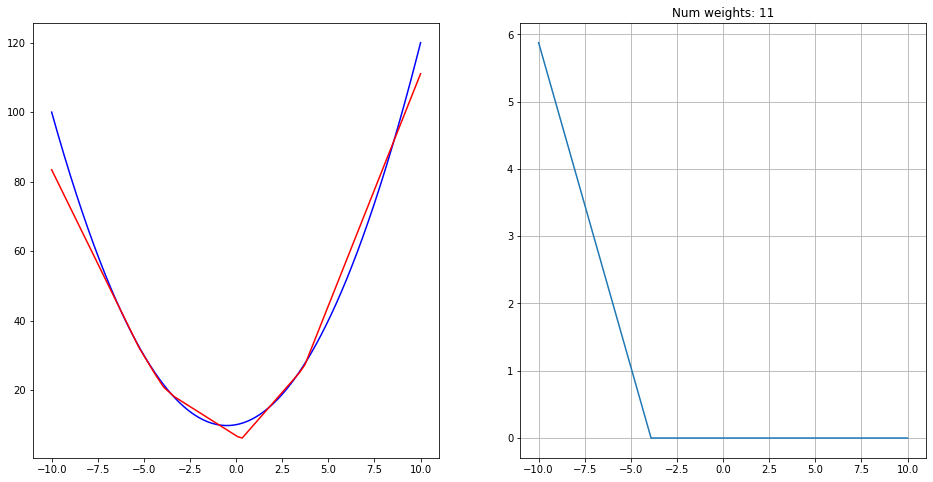

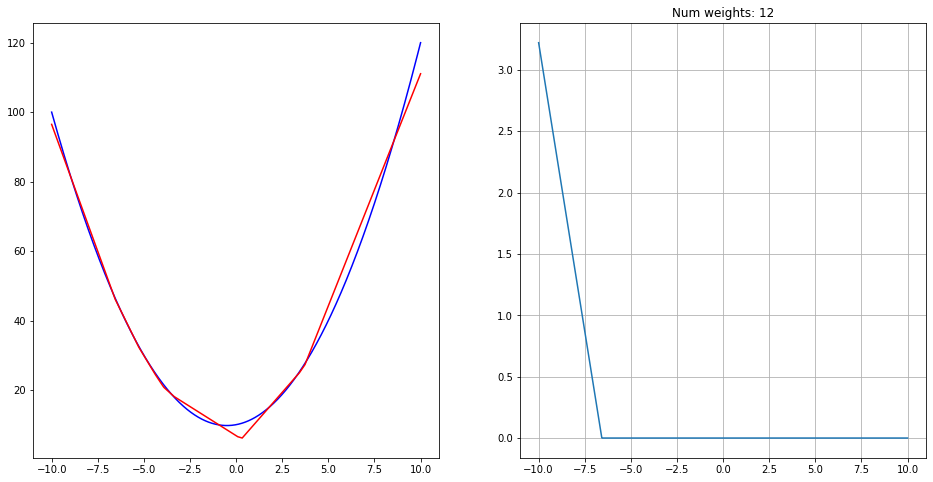

In [6]:
x, y = get_dataset()

model1 = build_model1()
model1.compile(
    optimizer=Adam(learning_rate=1e-2),
    loss="mse"
)
model1.fit(x, y, epochs=30)
y_pred_linear = model1.predict(x)

model2 = build_model2()
model2.compile(
    optimizer=Adam(learning_rate=1e-2),
    loss="mse"
)
model2.fit(x, y, epochs=30)
y_pred_relu = model2.predict(x)

model3 = build_model3()
model3.compile(
    optimizer=Adam(learning_rate=1e-2),
    loss="mse"
)
model3.fit(x, y, epochs=30)
y_pred_sigmoid = model3.predict(x)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(24, 12))
plt.grid(True)
ax1.plot(x, y, color="blue")
ax1.plot(x.flatten(), y_pred_linear.flatten(), color="red")
ax2.plot(x, y, color="blue")
ax2.plot(x.flatten(), y_pred_sigmoid.flatten(), color="red")
ax3.plot(x, y, color="blue")
ax3.plot(x.flatten(), y_pred_relu.flatten(), color="red")
plt.show()